# DATA101 FINAL PROJECT
# Exploration and Analysis of US Accidents Cases from 2020-2022
<a class="anchor" id="head"></a>
Submitted by: `Group 3`

Members:
1. Arceta, Althea Zyrie
2. Ducut, Ezekiel
3. Fausto, Lorane Bernadeth
4. Hidalgo, Francisco Jose


This notebook is an exploratory data analysis on the [US Traffic Accident Dataset](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents). The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [Reading the Dataset](#reading-the-dataset) |
| [Cleaning the Dataset](#cleaning-the-dataset) |
| [Exploratory Data Analysis](#Exploratory-data-analysis) |
| - [Question 1](#Question-1:-How-is-the-distribution-of-accident-severity-levels-(1-to-4)-in-the-dataset?-(Accident-Severity)) | 
| - [Question 2](#Question-2:-How-do-the-number-of-accidents-vary-by-year,-month,-day-of-the-week,-and-hour-of-the-day?-(Temporal-patterns-of-accidents)) |
| - [Question 3](#Question-3:-What-are-the-geographic-locations-with-the-highest-frequency-of-accidents?-(Geographic-distribution-of-accidents)) |
| - [Question 4](#Question-4:-What-are-the-most-common-weather-conditions-during-accidents?-(Analysis-of-weather-conditions)) |
| - [Question 5](#Question-5:-How-do-the-presence-of-traffic-signals,-junctions,-railways,-and-roundabouts-influence-the-occurrence-of-accidents?-(Analysis-of-contributing-factors)) |
| [Summary of Findings and Recommendations](#Summary-of-Findings-and-Recommendations) |
| [References](#references) |

## The Dataset

-- [Return to Table of Contents](#DATA101-FINAL-PROJECT) --


Since the new dataset has now been extracted to only contain accidents from January 01 2020 to December 31 2022, it is now time to clean and explore further.

## Importing Libraries
For this notebook, [**pandas**](https://pandas.pydata.org/), and [**matplotlib**](https://matplotlib.org/) must be imported. Additional libraries imported will be used for visualization in exploring the data. 

[*%matplotlib inline*](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) is also called to support a frontend display of the outputs of plotting commaands, printing it directly below the code cell that produced it.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the Dataset
-- [Return to Table of Contents](#DATA101-FINAL-PROJECT) --

Here we will load the dataset using pandas. This will load the dataset into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [26]:
filtered_df = pd.read_csv('../dataset/us_accidents_cut.csv')

The dataset is now loaded in the `filtered_df` variable.

The next cell show the contents of the [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). 

In [27]:
filtered_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.000,...,False,False,False,False,True,False,Night,Night,Day,Day
1,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.000,...,False,False,False,False,True,False,Night,Night,Night,Night
3,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.910,...,False,False,False,False,False,False,Night,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838874,A-7285297,Source1,2,2020-01-06 20:59:00,2020-01-06 21:32:38,34.265778,-118.454289,34.265778,-118.454289,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
3838875,A-7285298,Source1,2,2020-01-06 21:14:00,2020-01-06 23:16:38,35.736667,-119.742500,35.736667,-119.742500,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
3838876,A-7285299,Source1,2,2020-01-06 21:19:00,2020-01-06 22:19:37,34.075263,-118.281157,34.075263,-118.281157,0.000,...,False,False,True,True,False,False,Night,Night,Night,Night
3838877,A-7295668,Source1,2,2020-01-01 00:08:02,2020-01-01 00:37:03,42.315690,-83.085920,42.312500,-83.094120,0.473,...,False,False,False,False,False,False,Night,Night,Night,Night


Display the dataset info using the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function.

In [28]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838879 entries, 0 to 3838878
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

## Cleaning the Dataset

-- [Return to Table of Contents](#DATA101-FINAL-PROJECT) --

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

First, we check if there are any duplicated data in the dataset. We do this by calling the [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. The function checks and returns the duplicated values.

In [29]:
duplicated = filtered_df[filtered_df.duplicated()]
dupes = str(duplicated.shape)

print("Number of duplicates: "  + dupes[1 : (dupes.find(','))])

Number of duplicates: 0


In [30]:
print(filtered_df.head())

         ID   Source  Severity           Start_Time             End_Time  \
0  A-512230  Source2         1  2022-09-08 05:49:30  2022-09-08 06:34:53   
1  A-512231  Source2         1  2022-09-08 02:02:05  2022-09-08 04:31:32   
2  A-512232  Source2         1  2022-09-08 05:14:12  2022-09-08 07:38:17   
3  A-512233  Source2         1  2022-09-08 06:22:57  2022-09-08 06:52:42   
4  A-512234  Source2         2  2022-09-08 06:36:20  2022-09-08 07:05:58   

   Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  41.946796  -88.208092      NaN      NaN          0.00  ...      False   
1  34.521172 -117.958076      NaN      NaN          0.00  ...      False   
2  37.542839  -77.441780      NaN      NaN          0.00  ...      False   
3  40.896629  -81.178452      NaN      NaN          0.00  ...      False   
4  41.409359  -81.644318      NaN      NaN          1.91  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   Fal

Dropping of Columns

In [ ]:
columns_to_drop = [
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 
    'Astronomical_Twilight', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp'
]
filtered_df.drop(columns=columns_to_drop, inplace=True)

Adding New Columns

In [31]:
# Weather_New column
filtered_df['Weather_New'] = 'Placeholder'

# Clear_Time Colu,m
filtered_df['Start_Time'] = pd.to_datetime(filtered_df['Start_Time'])
filtered_df['End_Time'] = pd.to_datetime(filtered_df['End_Time'])
filtered_df['Clear_Time'] = filtered_df['End_Time'] - filtered_df['Start_Time']



         ID   Source  Severity           Start_Time             End_Time  \
0  A-512230  Source2         1  2022-09-08 05:49:30  2022-09-08 06:34:53   
1  A-512231  Source2         1  2022-09-08 02:02:05  2022-09-08 04:31:32   
2  A-512232  Source2         1  2022-09-08 05:14:12  2022-09-08 07:38:17   
3  A-512233  Source2         1  2022-09-08 06:22:57  2022-09-08 06:52:42   
4  A-512234  Source2         2  2022-09-08 06:36:20  2022-09-08 07:05:58   

   Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  41.946796  -88.208092      NaN      NaN          0.00  ...      False   
1  34.521172 -117.958076      NaN      NaN          0.00  ...      False   
2  37.542839  -77.441780      NaN      NaN          0.00  ...      False   
3  40.896629  -81.178452      NaN      NaN          0.00  ...      False   
4  41.409359  -81.644318      NaN      NaN          1.91  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   Fal

In [32]:
print(filtered_df.head()) # To check for columns after dropped and added columns

         ID   Source  Severity          Start_Time            End_Time  \
0  A-512230  Source2         1 2022-09-08 05:49:30 2022-09-08 06:34:53   
1  A-512231  Source2         1 2022-09-08 02:02:05 2022-09-08 04:31:32   
2  A-512232  Source2         1 2022-09-08 05:14:12 2022-09-08 07:38:17   
3  A-512233  Source2         1 2022-09-08 06:22:57 2022-09-08 06:52:42   
4  A-512234  Source2         2 2022-09-08 06:36:20 2022-09-08 07:05:58   

   Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... No_Exit Railway  \
0  41.946796  -88.208092      NaN      NaN          0.00  ...   False   False   
1  34.521172 -117.958076      NaN      NaN          0.00  ...   False   False   
2  37.542839  -77.441780      NaN      NaN          0.00  ...   False   False   
3  40.896629  -81.178452      NaN      NaN          0.00  ...   False   False   
4  41.409359  -81.644318      NaN      NaN          1.91  ...   False   False   

  Roundabout Station   Stop Traffic_Calming Traffic_Signal  Turning_

In [33]:
filtered_df.to_csv('us_accidents_clean.csv', index=False)

In [34]:
unique_weather_conditions = filtered_df['Weather_Condition'].unique()
print(unique_weather_conditions)

['Fair' 'Mostly Cloudy' 'Partly Cloudy' 'Cloudy' nan 'Fog' 'Haze'
 'Light Rain' 'Thunder in the Vicinity' 'Rain' 'Heavy Rain'
 'Heavy Rain / Windy' 'Fair / Windy' 'Light Rain with Thunder' 'Smoke'
 'Thunder' 'Shallow Fog' 'Patches of Fog' 'Light Drizzle'
 'Showers in the Vicinity' 'T-Storm' 'Thunder / Windy'
 'Heavy T-Storm / Windy' 'Heavy T-Storm' 'Drizzle' 'Light Rain / Windy'
 'Mist' 'Mostly Cloudy / Windy' 'N/A Precipitation' 'Light Rain Shower'
 'Partly Cloudy / Windy' 'Cloudy / Windy' 'Drizzle and Fog'
 'T-Storm / Windy' 'Rain / Windy' 'Blowing Dust' 'Heavy Drizzle'
 'Smoke / Windy' 'Haze / Windy' 'Tornado' 'Light Snow' 'Snow'
 'Light Drizzle / Windy' 'Blowing Dust / Windy' 'Widespread Dust / Windy'
 'Wintry Mix' 'Light Snow / Windy' 'Wintry Mix / Windy'
 'Light Snow with Thunder' 'Fog / Windy' 'Snow and Thunder' 'Heavy Snow'
 'Light Snow Shower' 'Sleet' 'Light Snow and Sleet' 'Snow / Windy'
 'Rain Shower' 'Light Freezing Rain' 'Snow and Sleet' 'Light Sleet'
 'Light Freezing Driz

In [37]:
unique_weather_count = filtered_df['Weather_Condition'].nunique()
print(unique_weather_count)

106


In [19]:
# Convert datetime columns to datetime type
filtered_df['Start_Time'] = pd.to_datetime(filtered_df['Start_Time'], errors='coerce')
filtered_df['End_Time'] = pd.to_datetime(filtered_df['End_Time'], errors='coerce')
filtered_df['Weather_Timestamp'] = pd.to_datetime(filtered_df['Weather_Timestamp'], errors='coerce')

# Remove invalid latitude and longitude values
filtered_df = filtered_df[(filtered_df['Start_Lat'].between(-90, 90)) & 
                          (filtered_df['Start_Lng'].between(-180, 180)) &
                          (filtered_df['End_Lat'].between(-90, 90)) & 
                          (filtered_df['End_Lng'].between(-180, 180))]

# Fill or drop missing numerical values
numerical_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
                     'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                     'Precipitation(in)']

filtered_df[numerical_columns] = filtered_df[numerical_columns].apply(pd.to_numeric, errors='coerce')
filtered_df[numerical_columns] = filtered_df[numerical_columns].fillna(filtered_df[numerical_columns].mean())







# Add the Clear_Time column
filtered_df['Start_Time'] = pd.to_datetime(filtered_df['Start_Time'])
filtered_df['End_Time'] = pd.to_datetime(filtered_df['End_Time'])
filtered_df['Clear_Time'] = filtered_df['End_Time'] - filtered_df['Start_Time']


# Clean text columns
filtered_df['City'] = filtered_df['City'].str.title().str.strip()
filtered_df['County'] = filtered_df['County'].str.title().str.strip()
filtered_df['State'] = filtered_df['State'].str.upper().str.strip()
filtered_df['Zipcode'] = filtered_df['Zipcode'].str.strip()
filtered_df['Weather_Condition'] = filtered_df['Weather_Condition'].str.title().str.strip()
filtered_df['Wind_Direction'] = filtered_df['Wind_Direction'].str.title().str.strip()

# Convert categorical boolean columns to boolean type
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                   'Traffic_Signal', 'Turning_Loop']

filtered_df[boolean_columns] = filtered_df[boolean_columns].applymap(lambda x: True if x == 'True' else False)

# Ensure timezone is consistent
valid_timezones = ['EST', 'CST', 'MST', 'PST', 'AKST', 'HST']
filtered_df = filtered_df[filtered_df['Timezone'].isin(valid_timezones)]

# Optionally, drop rows with any remaining missing values
filtered_df.dropna(inplace=True)

# Display cleaned dataframe
print(filtered_df.head())

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_6676\1950534021.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[numerical_columns] = filtered_df[numerical_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_6676\1950534021.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[numerical_columns] = filtered_df[numerical_columns].fillna(filtered_df[numerical_columns].mean())
C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_6676\1950534021.py:27: S

Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight, Clear_Time]
Index: []

[0 rows x 47 columns]


## Exploratory Data Analysis

-- [Return to Table of Contents](#DATA101-FINAL-PROJECT) --

In this part of the notebook, details about the dataset will be explored and shown in figures.

We will first determine how many rows and columns there are in the dataset provided.

In [94]:
filtered_df.shape

(3838879, 46)

The result of **(3838879, 46)** shows *(row, column)*, so there are `3838879 rows and 46 columns` in total.

Next, we will use the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to get the overview of details in each column. This information will be further used to fill null values in the dataset, if there are any.

In [95]:
filtered_df.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.838879e+06,3838879,3.838879e+06,3.838879e+06,2.682368e+06,2.682368e+06,3.838879e+06,3.753079e+06,3.723716e+06,3.747358e+06,3.765649e+06,3.751208e+06,3.735905e+06,3.673299e+06
mean,2.135426e+00,2021-07-18 10:01:27.347369728,3.599983e+01,-9.414079e+01,3.596040e+01,-9.491957e+01,6.788216e-01,6.177597e+01,6.056196e+01,6.454039e+01,2.936279e+01,9.080646e+00,7.280809e+00,5.750087e-03
min,1.000000e+00,2020-01-01 00:01:00,2.455480e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,1.671000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2020-11-24 23:15:14,3.306817e+01,-1.171363e+02,3.295475e+01,-1.175007e+02,0.000000e+00,4.900000e+01,4.900000e+01,4.800000e+01,2.918000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,2021-07-30 20:37:00,3.576493e+01,-8.673641e+01,3.587211e+01,-8.678178e+01,1.060000e-01,6.400000e+01,6.400000e+01,6.700000e+01,2.969000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,2022-03-19 08:45:37,3.996280e+01,-8.024575e+01,3.997168e+01,-8.018828e+01,6.690000e-01,7.600000e+01,7.600000e+01,8.400000e+01,2.996000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,2022-12-31 00:00:00,4.900050e+01,-6.748413e+01,4.900222e+01,-6.748413e+01,4.417500e+02,2.030000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01
std,4.441108e-01,NaN,5.156602e+00,1.739545e+01,5.316566e+00,1.794949e+01,1.848918e+00,1.895041e+01,2.103302e+01,2.296956e+01,1.089193e+00,2.528536e+00,5.531657e+00,5.429836e-02


### Question 1: How is the distribution of accident severity levels (1 to 4) in the dataset? (Accident Severity) 

Since we have already filtered out the outliers, we will now do an analysis of accident severity

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3528349220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')


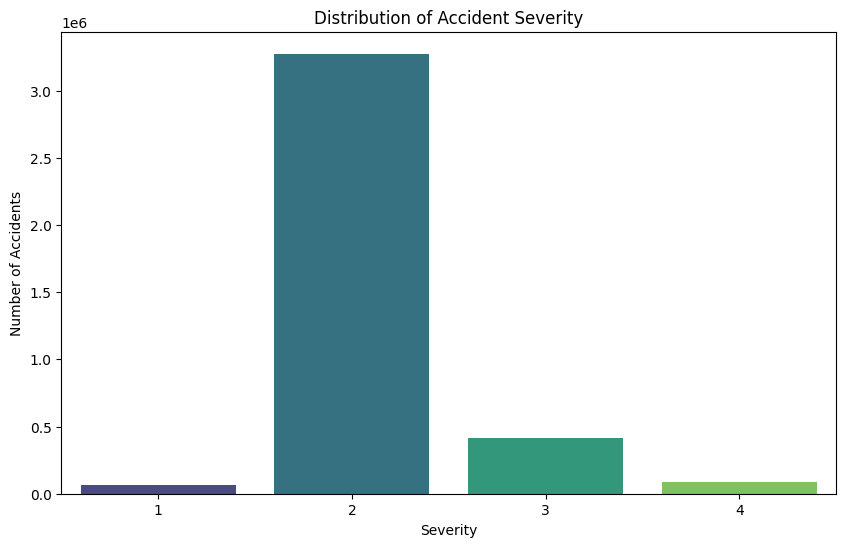

In [96]:
severity_counts = filtered_df['Severity'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

The distribution of accident severity indicates that the majority of accidents fall under **severity 2**, with over 3 million incidents, suggesting most accidents result in moderate impact, likely involving property damage but fewer severe injuries. **Severity 1** and **severity 4** accidents are the least frequent, with **severity 1** being the lowest, indicating that minor accidents are relatively rare, and **severity 4**, representing the most severe accidents, possibly involving serious injuries or fatalities. **Severity 3** accidents, though significantly fewer than **severity 2**, still represent a notable number of more severe accidents. The high frequency of **severity 2** accidents could be attributed to urban traffic conditions, road infrastructure, and driving behavior, emphasizing the need for targeted interventions to reduce the overall accident rate and improve road safety. 

### Question 2: How do the number of accidents vary by year, month, day of the week, and hour of the day? (Temporal patterns of accident)

This will identify trends in the frequency and timing of accidents based on the time of day, day of the week, and month of the year, helping to understand when accidents are most likely to occur.

Extract date and time related features

In [97]:
filtered_df['Year'] = filtered_df['Start_Time'].dt.year
filtered_df['Month'] = filtered_df['Start_Time'].dt.month
filtered_df['DayOfWeek'] = filtered_df['Start_Time'].dt.dayofweek
filtered_df['Hour'] = filtered_df['Start_Time'].dt.hour

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\995380706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Start_Time'].dt.year
C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\995380706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Start_Time'].dt.month
C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\995380706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Accidents per year

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\1921551583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Year', palette='viridis')


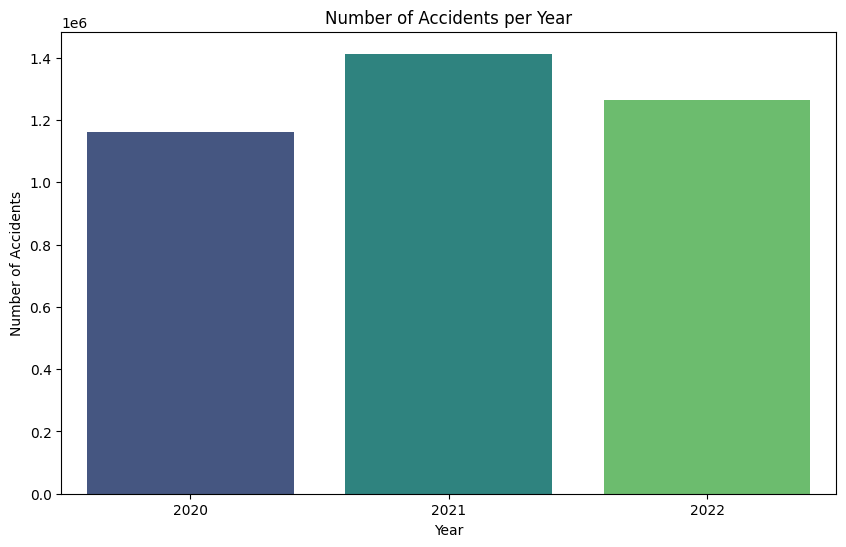

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Year', palette='viridis')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

Based on the result, the number of accidents per year shows a noticeable variation between `2020, 2021, and 2022`. In **2020**, the number of accidents is just over 1 million, which increases significantly in 2021 to approximately 1.4 million, indicating a sharp rise. However, in **2022**, there is a slight decrease from the previous year, with the total number of accidents dropping to just below 1.3 million. This fluctuation may reflect the impact of various factors, such as changes in traffic volume, road safety measures, and external influences like the COVID-19 pandemic, which likely reduced traffic in 2020 and led to a subsequent increase in accidents as traffic volumes rebounded in **2021**. The slight reduction in **2022** might indicate the effect of new safety measures or a return to more typical traffic patterns.

Accidents per month

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3728907198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Month', palette='viridis')


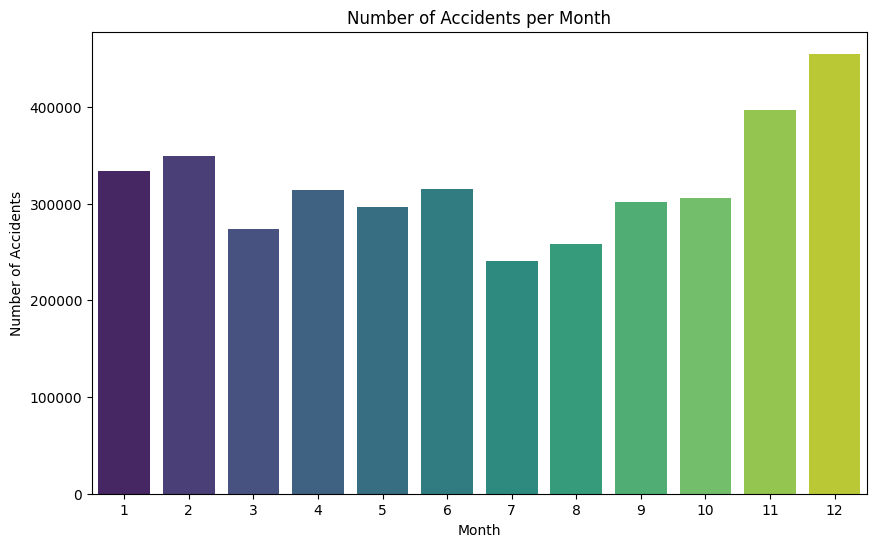

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Month', palette='viridis')
plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

The number of accidents per month exhibits distinct seasonal patterns. The graph shows that certain months experience higher accident rates compared to others, with noticeable peaks and troughs throughout the year. This variation indicates that the occurrence of traffic accidents fluctuates on a monthly basis. Urban planners and traffic management authorities can use this information to identify periods with higher accident frequencies and allocate resources accordingly to improve road safety and manage traffic more effectively.

Accidents per day of the week

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3429072184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='DayOfWeek', palette='viridis')


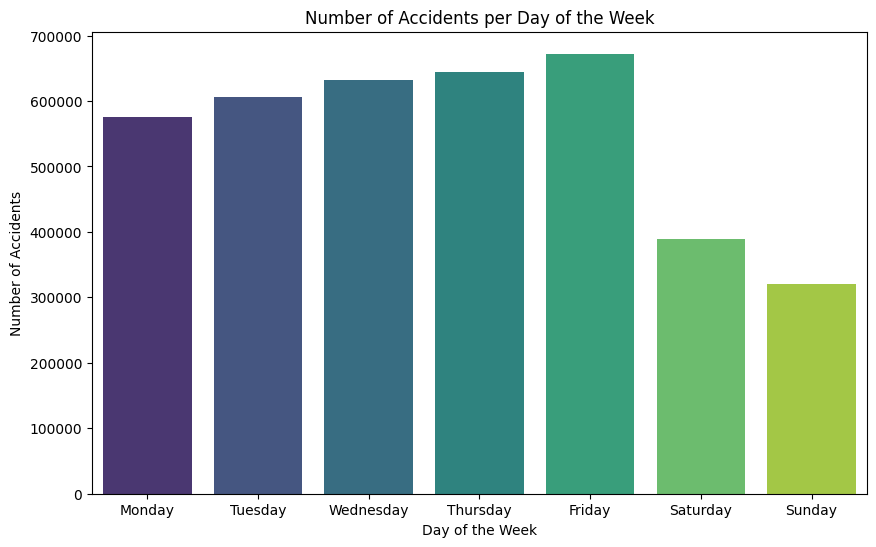

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='DayOfWeek', palette='viridis')
plt.title('Number of Accidents per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

The results show that the number of accidents per day of the week varies, with **Friday** having the highest number of accidents, followed closely by **Wednesday** and **Thursday**. The number of accidents gradually decreases towards the weekend, with **Saturday** and **Sunday** having the lowest counts. This indicates that there are more traffic accidents on **weekdays** compared to **weekends**. These patterns are indications as to how to manage efforts on improving road safey during the days with higher accident rates.

Accidents per hour of the day

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\1660204678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Hour', palette='viridis')


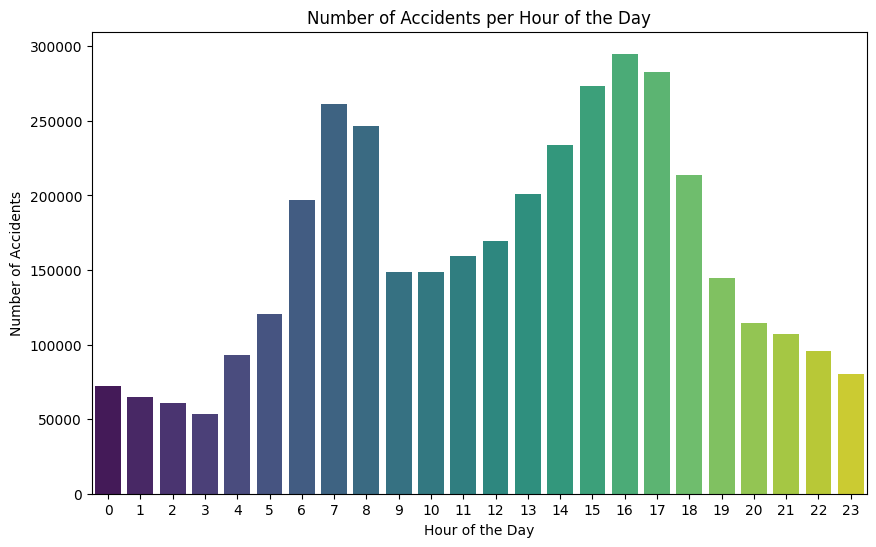

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Hour', palette='viridis')
plt.title('Number of Accidents per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

The number of accidents per hour of the day shows a distinct pattern, with the highest number of accidents occurring between **15:00 (3 PM)** and **17:00 (5 PM)**, indicating peak traffic hours in the late afternoon. There is also a significant increase in accidents starting from **6:00 (6 AM)** with a peak around **8:00 (8 AM)**, which suggests another high traffic period during the morning commute. The number of accidents then gradually decreases in the evening and is lowest between midnight and **5:00 (5 AM)**. These patterns indicate that the frequency of accidents is closely related to daily traffic flow, with peaks during common commuting hours.

### Question 3: What are the geographic locations with the highest frequency of accidents? (Geographic distribution of accidents)

This will reveal the locations with the highest frequency of incidents, helping urban planners and traffic management authorities to identify critical areas that require targeted safety improvements and interventions.

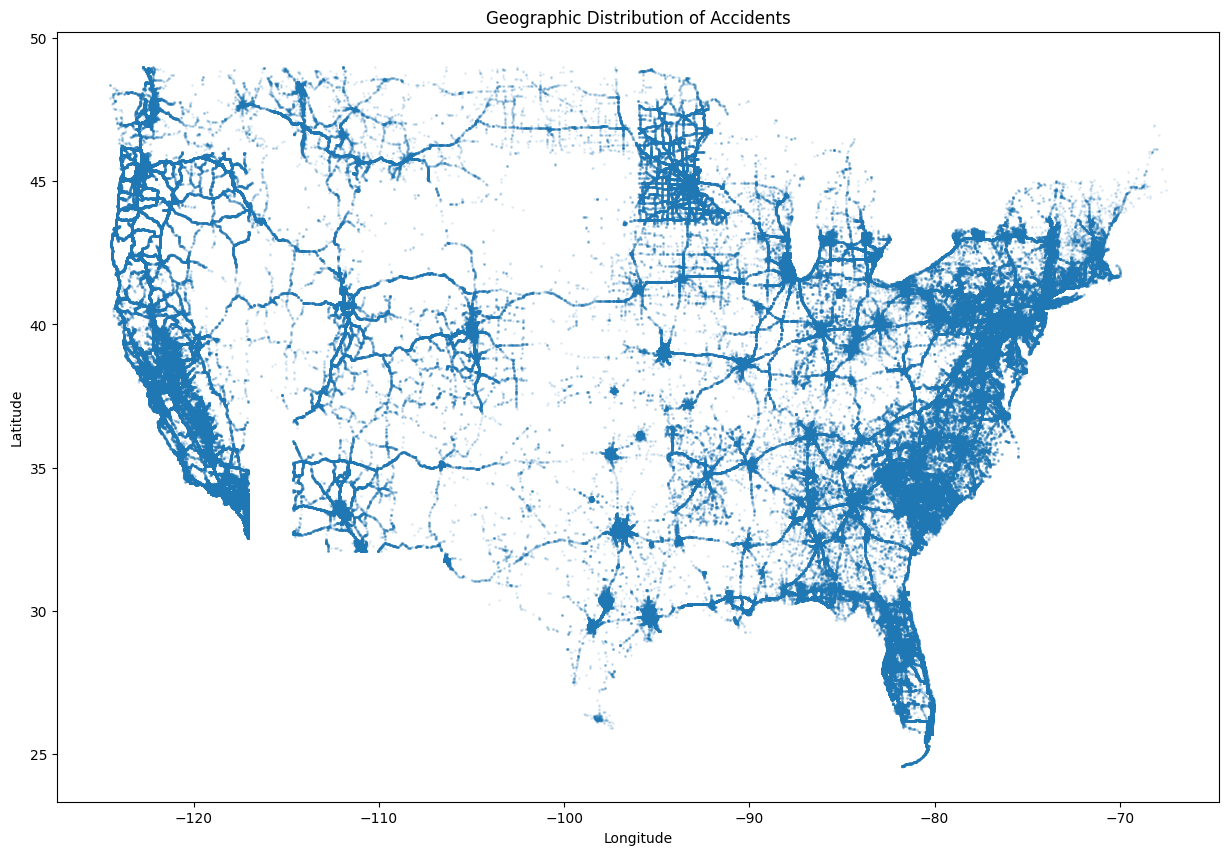

In [102]:
plt.figure(figsize=(15, 10))
plt.scatter(filtered_df['Start_Lng'], filtered_df['Start_Lat'], alpha=0.1, s=1)
plt.title('Geographic Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The geographic distribution of accidents across the United States reveals a dense concentration of incidents along major highways and in urban areas. The visualization highlights specific regions with higher frequencies of accidents, indicating that certain locations experience more traffic incidents. This information can help urban planners and traffic management authorities to pinpoint critical areas for implementing road safety measures and infrastructure improvements.

### Question 4: What are the most common weather conditions during accidents? (Analysis of weather conditions)

This helps identify how different weather scenarios impact accident frequency, aiding in the development of targeted safety measures for adverse weather conditions.

We will be getting the top 10 weather conditions during accidents.

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3631100187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='viridis')


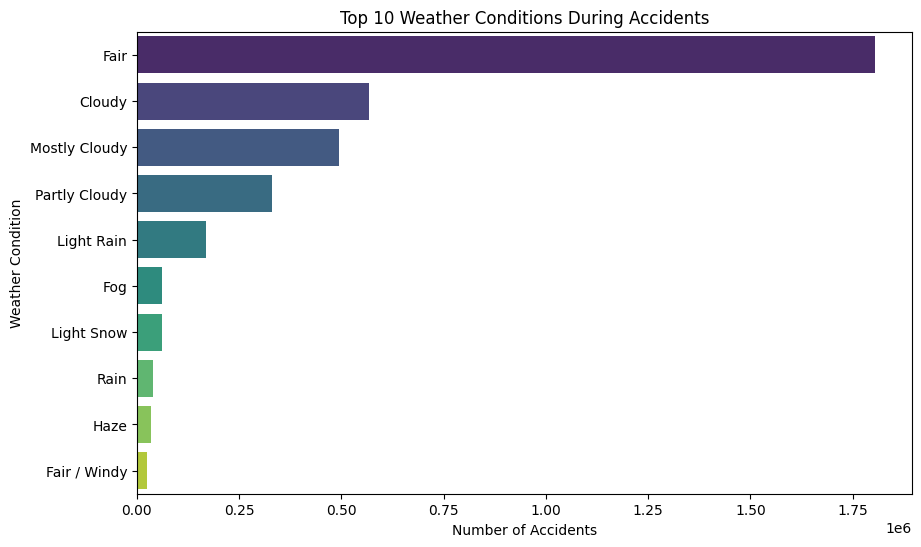

In [103]:
weather_counts = filtered_df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='viridis')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

The top 10 weather conditions during accidents show that the majority of accidents occur under **fair** weather conditions, followed by **cloudy** and **mostly cloudy** conditions. Partly `cloudy, light rain, and fog conditions` also have a significant number of accidents, with fewer incidents occurring during `light snow, rain, haze, and fair/windy conditions`. This distribution indicates that accidents happen under a variety of weather conditions, with a higher frequency under **fair** and **cloudy** conditions. This data can help traffic management authorities understand the prevalence of accidents across different weather scenarios.

### Question 5: How do the presence of traffic signals, junctions, railways, and roundabouts influence the occurrence of accidents? (Analysis of contributing factors)

This will help to identify specific conditions or elements, such as the presence of traffic signals, junctions, or road features, that influence the likelihood of accidents, enabling targeted interventions to improve road safety.

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3418524681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')


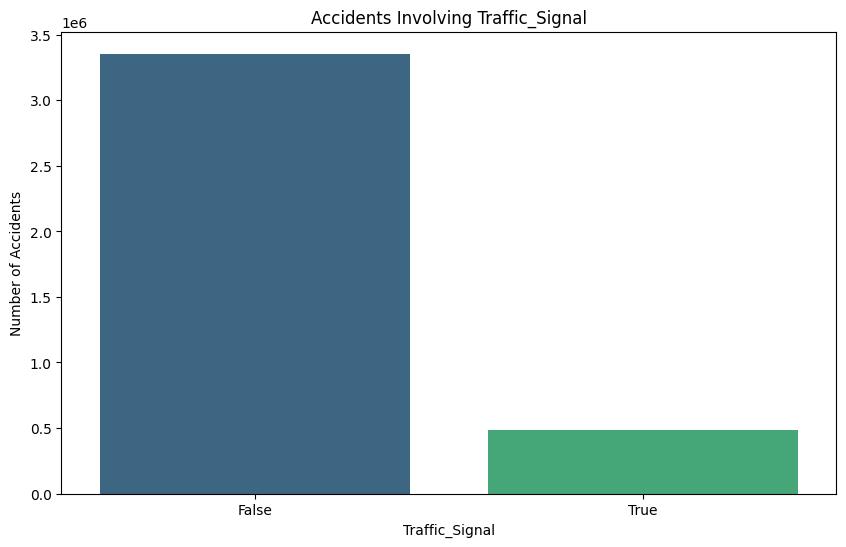

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3418524681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')


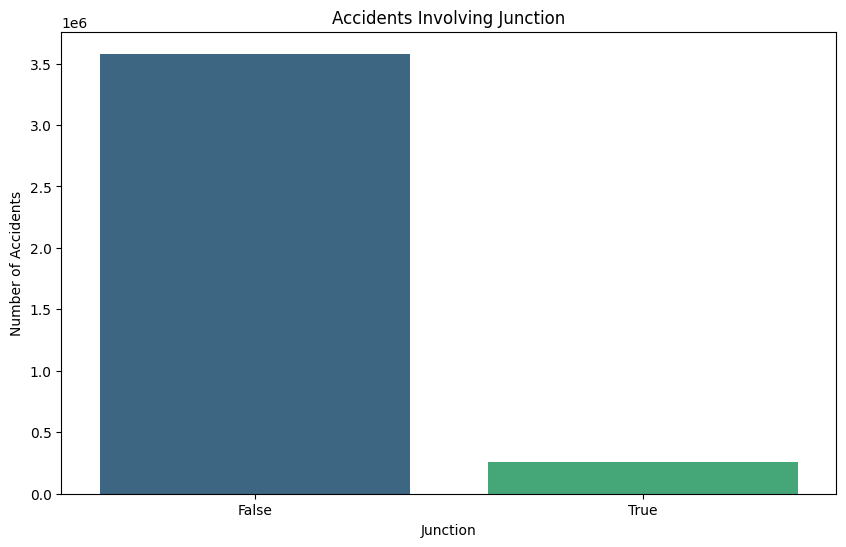

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3418524681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')


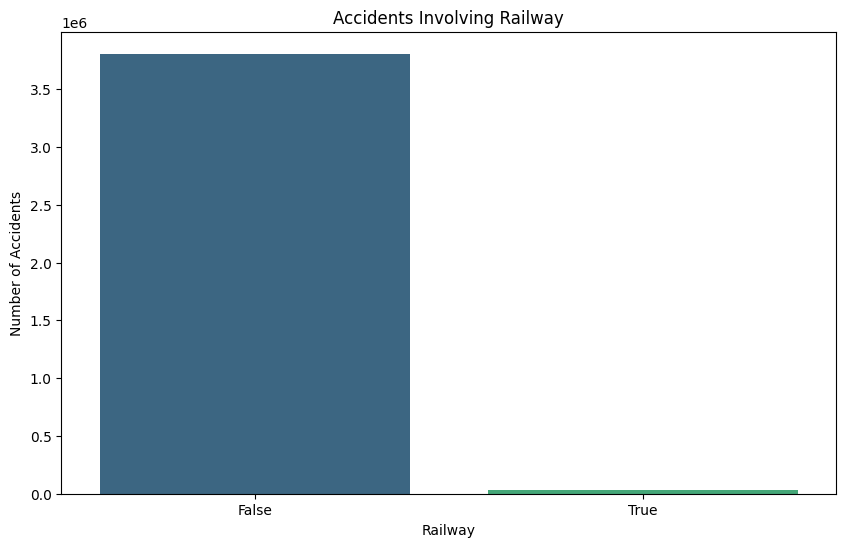

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3418524681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')


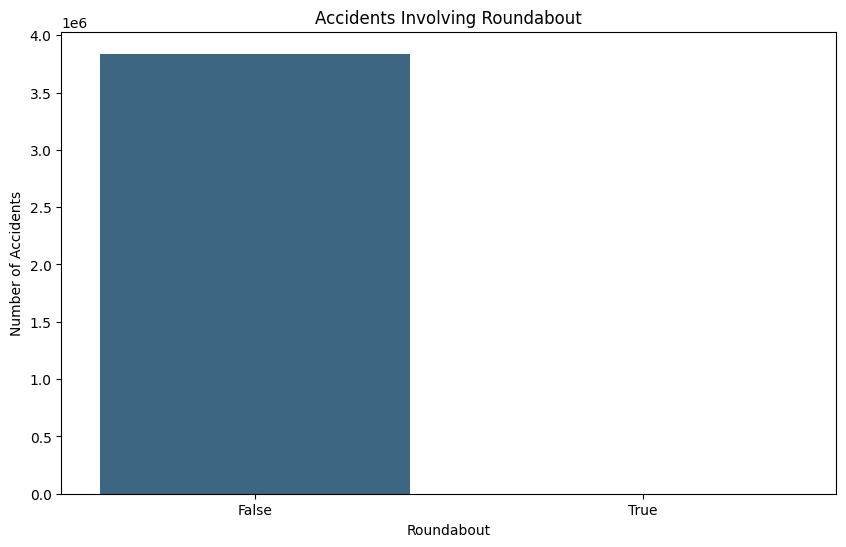

In [104]:
contributing_factors = ['Traffic_Signal', 'Junction', 'Railway', 'Roundabout']
for factor in contributing_factors:
    factor_counts = filtered_df[factor].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')
    plt.title(f'Accidents Involving {factor}')
    plt.xlabel(factor)
    plt.ylabel('Number of Accidents')
    plt.show()

Based on the results of all 4 figures, the majority of accidents occur at locations without traffic signals, junctions, railways, and roundabouts. Over 3 million accidents happen at locations **without traffic signals** compared to 500,000 at locations with signals. Similarly, more than 3.5 million accidents occur without junctions, with around 500,000 at junctions. Accidents at railway crossings and roundabouts are exceedingly rare, suggesting these features are not significant contributors to overall accident rates. These findings indicate that while these road features play roles in traffic control, other factors like road conditions, driver behavior, and traffic density may have a greater impact on accident occurrences.

Overall, these findings suggest that while certain road features such as traffic signals, junctions, railways, and roundabouts are present, they are not the primary locations for most accidents. This highlights the importance of considering other factors, such as road conditions, driver behavior, and traffic density, when analyzing and implementing traffic safety measures.

### Question 6. What are the correlations between different variables (e.g., weather conditions, time of day, location) and accident frequency or severity?

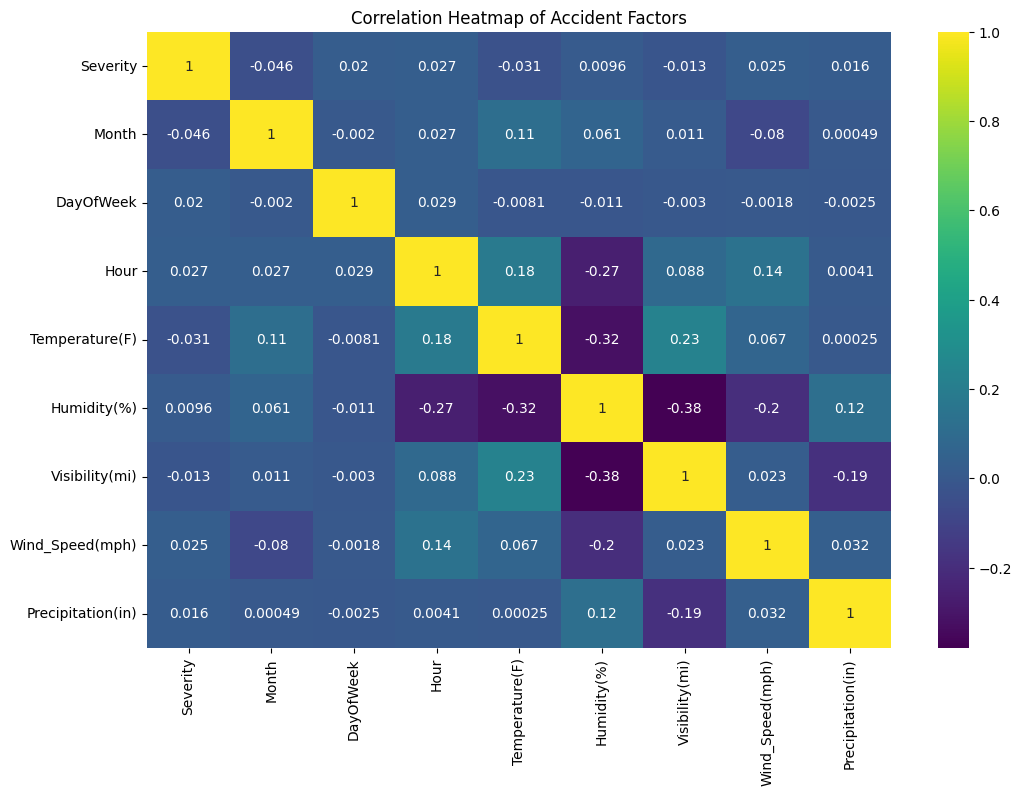

In [105]:
correlation_columns = ['Severity', 'Month', 'DayOfWeek', 'Hour', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
correlation_df = filtered_df[correlation_columns].dropna()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Accident Factors')
plt.show()

Description of result

C:\Users\EZEE.DT\AppData\Local\Temp\ipykernel_8860\3251412617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YearMonth'] = filtered_df['Start_Time'].dt.to_period('M')


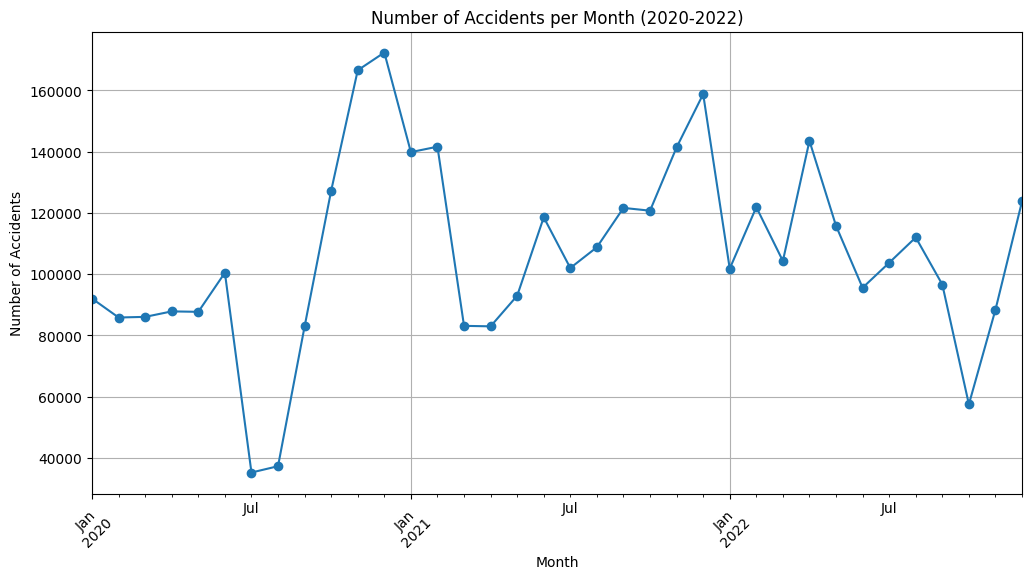

In [106]:
# Extract year and month from the 'Start_Time' column
filtered_df['YearMonth'] = filtered_df['Start_Time'].dt.to_period('M')

# Group by 'YearMonth' and count the number of accidents
monthly_accidents = filtered_df.groupby('YearMonth').size()

# Plot the number of accidents per month over time
plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='line', marker='o')
plt.title('Number of Accidents per Month (2020-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Desc of  Res

## Summary

-- [Return to Table of Contents](#DATA101-FINAL-PROJECT) --

The analysis of accident data reveals that the majority of accidents are of severity 2, indicating moderate impact with significant property damage but fewer severe injuries. Accidents of severity 1 and severity 4 are the least frequent, while severity 3 represents a notable number of severe accidents. Yearly variation shows a sharp increase in accidents from just over 1 million in 2020 to approximately 1.4 million in 2021, followed by a slight decrease to just below 1.3 million in 2022, reflecting changes in traffic volume, road safety measures, and external factors like the COVID-19 pandemic. Geographically, accidents are concentrated along major highways and urban areas, highlighting critical regions for road safety improvements. Most accidents occur under fair and cloudy weather conditions, with fewer incidents in adverse weather. Interestingly, over 3 million accidents happen at locations without traffic signals, and more than 3.5 million occur without junctions, suggesting that road conditions, driver behavior, and traffic density significantly influence accident rates. This comprehensive understanding underscores the importance of targeting interventions to improve urban traffic conditions, road infrastructure, and driver behavior to enhance overall road safety.